In [9]:
%pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
from pathlib import Path
import pyModeS as pms
import seaborn as sns
import base64
import tarfile
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import dask.dataframe as dd


In [2]:
path = Path(r'C:\Users\araca\Documents\UNIVERSIDAD\PROYECTO DE DATOS II\datos_consolidados.csv')
csv_file = path
df = pd.read_csv(csv_file)
df

C:\Users\araca\AppData\Local\Temp\ipykernel_6280\3557434559.py:3: DtypeWarning: Columns (2,3,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


,ts_kafka,message,ICAO address,Type,Speed,Altitude,Capability,Capability_prev
0,2024-12-05 04:19:39,8c000000000000000000006493d8,000000,NaN,NaN,NaN,False,NaN
1,2024-12-05 04:21:03,2e9a39c43e7d0c,000000,NaN,NaN,NaN,NaN,False
2,2024-12-05 04:23:36,8c000000000000000000006493d8,000000,NaN,NaN,NaN,False,NaN
3,2024-12-05 04:23:41,2e9a39c43e7d0c,000000,NaN,NaN,NaN,NaN,False
4,2024-12-05 04:29:30,8c000000000000000000006493d8,000000,NaN,NaN,NaN,False,NaN
...,...,...,...,...,...,...,...,...
38698435,2024-12-05 22:25:01,8de80475f82100020049bc606609,e80475,NaN,NaN,NaN,True,True
38698436,2024-12-05 17:36:36,90f762b700587688c731411f9362,f762b7,NaN,NaN,NaN,NaN,NaN
38698437,2024-12-05 02:52:20,8bfa8511f705239691577cb434fe,fa8511,NaN,NaN,NaN,NaN,NaN
38698438,2024-12-05 02:48:52,8efb8819fe72847ee878d4bc0164,fb8819,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['ts_kafka', 'message', 'ICAO address', 'Type', 'Speed', 'Altitude',
       'Capability', 'Capability_prev'],
      dtype='object')

In [4]:
# Suponiendo que ts_kafka es de tipo datetime, si no, conviértelo antes
df['ts_kafka'] = pd.to_datetime(df['ts_kafka'])

# Detectar cambios de Capability de False a True
df['Capability_shifted'] = df.groupby('ICAO address')['Capability'].shift(1)
result_df = df[(df['Capability'] == True) & (df['Capability_shifted'] == False)]

# Eliminar duplicados por ICAO address y ts_kafka, manteniendo el primero
result_df = result_df.drop_duplicates(subset=['ICAO address', 'ts_kafka'], keep='first')

# Eliminar columna auxiliar
result_df = result_df.drop(columns=['Capability_shifted'])

result_df

,ts_kafka,message,ICAO address,Type,Speed,Altitude,Capability,Capability_prev
7,2024-12-05 05:46:05,a0001690c4666ea8900427f4e08c,000000,NaN,NaN,10668.00,True,False
275,2024-12-05 09:29:56,5d0000019b131b,000001,NaN,NaN,NaN,True,False
61933,2024-12-05 14:22:32,8d010244ea1978f0013c003b54e5,010244,Target State and Status,NaN,NaN,True,False
84254,2024-12-05 18:22:09,8d020044990c010cb00419d21294,020044,Ground speed,100.0,NaN,True,False
512099,2024-12-05 10:54:58,8d0200ed580d368c9720fe250b1a,0200ed,Airborne position (with barometric altitude),NaN,449.58,True,False
...,...,...,...,...,...,...,...,...
38654405,2024-12-05 23:50:14,8de8044b580d668c79204f775b39,e8044b,Airborne position (with barometric altitude),NaN,472.44,True,False
38654409,2024-12-05 23:50:15,5de8044bebe8d2,e8044b,NaN,NaN,NaN,True,False
38667565,2024-12-05 22:46:46,8de8045bf80100020049bc10e51f,e8045b,NaN,NaN,NaN,True,False
38689016,2024-12-05 12:31:49,8de80475e106880000000039dd4b,e80475,NaN,NaN,NaN,True,False


100%|██████████| 904/904 [21:31<00:00,  1.43s/it]


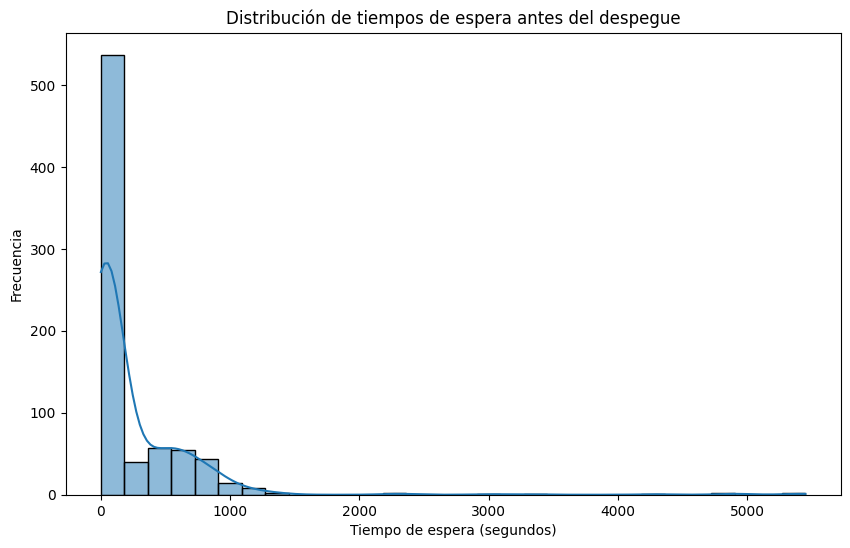

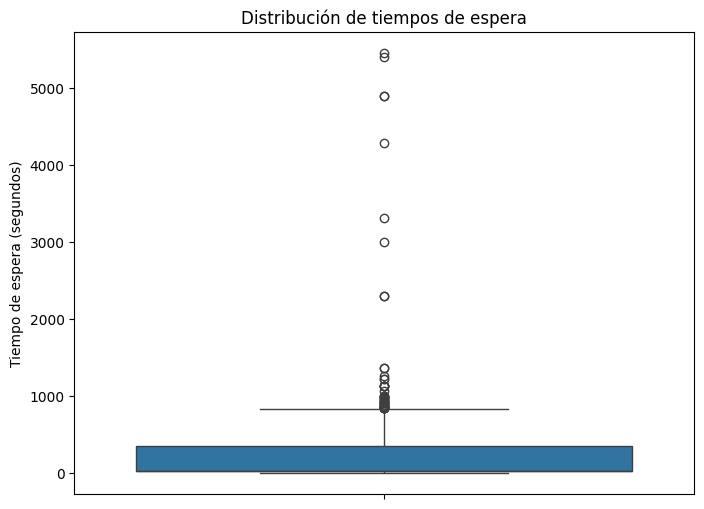

SpecificationError: nested renamer is not supported

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# 1. Preparar el DataFrame
df = df[['ICAO address', 'ts_kafka', 'Capability', 'Speed']].copy()
df['ts_kafka'] = pd.to_datetime(df['ts_kafka'])
df = df.sort_values(['ICAO address', 'ts_kafka'])

# 2. Detectar despegues (donde Capability cambia de False a True)
df['prev_capability'] = df.groupby('ICAO address')['Capability'].shift(1)
despegues = df[
    (df['Capability'] == True) & 
    (df['prev_capability'] == False)
].copy()

# 3. Preparar listas para resultados
tiempos_espera = []
horas_espera = []
icao_addresses = []
tiempos_despegue = []
tiempos_tierra = []

# 4. Procesar cada despegue
for _, despegue in tqdm(despegues.iterrows(), total=len(despegues)):
    icao = despegue['ICAO address']
    tiempo_despegue = despegue['ts_kafka']
    
    # Buscar mensajes anteriores al despegue para este avión
    mensajes_previos = df[
        (df['ICAO address'] == icao) & 
        (df['ts_kafka'] < tiempo_despegue)
    ].copy()
    
    # Encontrar el último momento en que el avión estaba parado (Speed = 0)
    mensajes_tierra = mensajes_previos[mensajes_previos['Speed'] == 0]
    
    if not mensajes_tierra.empty:
        ultimo_tierra = mensajes_tierra.iloc[-1]
        tiempo_espera = (tiempo_despegue - ultimo_tierra['ts_kafka']).total_seconds()
        
        # Solo considerar tiempos de espera razonables (entre 0 y 2 horas)
        if 0 < tiempo_espera < 7200:
            tiempos_espera.append(tiempo_espera)
            horas_espera.append(ultimo_tierra['ts_kafka'].hour)
            icao_addresses.append(icao)
            tiempos_despegue.append(tiempo_despegue)
            tiempos_tierra.append(ultimo_tierra['ts_kafka'])

# 5. Crear DataFrame con resultados
df_espera = pd.DataFrame({
    'ICAO address': icao_addresses,
    'Tiempo despegue': tiempos_despegue,
    'Último tiempo en tierra': tiempos_tierra,
    'Tiempo de espera (s)': tiempos_espera,
    'Hora': horas_espera
})

# 6. Visualizaciones
if not df_espera.empty:
    # Histograma
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_espera, x='Tiempo de espera (s)', bins=30, kde=True)
    plt.xlabel('Tiempo de espera (segundos)')
    plt.ylabel('Frecuencia')
    plt.title('Distribución de tiempos de espera antes del despegue')
    plt.show()

    # Boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df_espera['Tiempo de espera (s)'])
    plt.ylabel('Tiempo de espera (segundos)')
    plt.title('Distribución de tiempos de espera')
    plt.show()

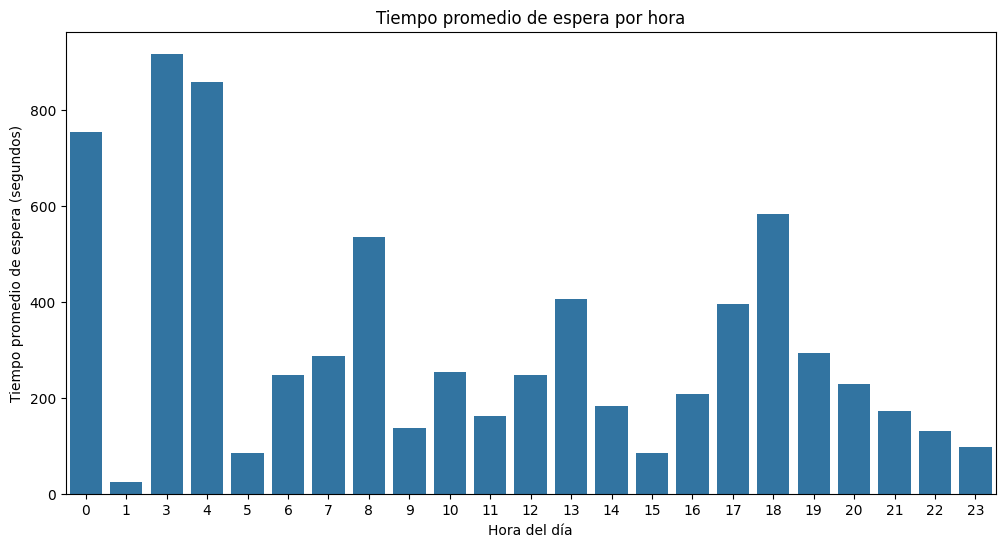

In [26]:
# Tiempo promedio por hora
plt.figure(figsize=(12, 6))
espera_por_hora = df_espera.groupby('Hora')['Tiempo de espera (s)'].mean()
sns.barplot(x=espera_por_hora.index, y=espera_por_hora.values)
plt.xlabel('Hora del día')
plt.ylabel('Tiempo promedio de espera (segundos)')
plt.title('Tiempo promedio de espera por hora')
plt.show()

100%|██████████| 2833/2833 [1:19:12<00:00,  1.68s/it]


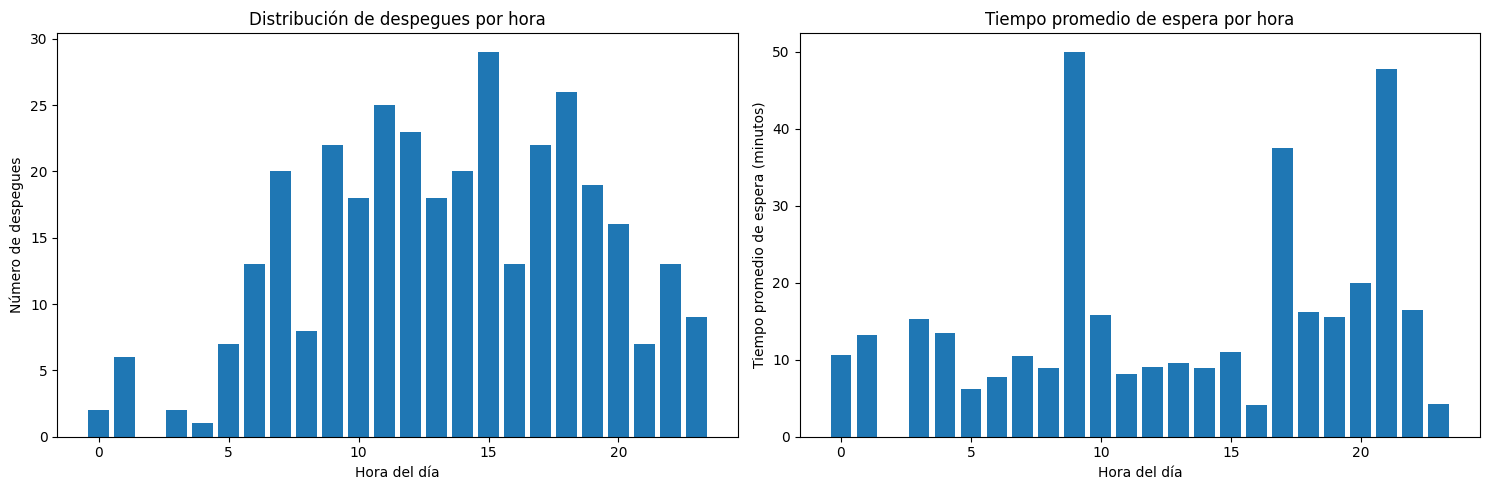


Estadísticas de tiempos de espera:
Total de despegues analizados: 339

Tiempo de espera (minutos):
count      5.650000
mean      16.307571
std       33.680159
min        1.016667
25%        2.466667
50%        8.216667
75%       12.408333
max      175.066667
Name: Tiempo de espera, dtype: float64


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Convertir a datetime y preparar DataFrame
df['ts_kafka'] = pd.to_datetime(df['ts_kafka'])
df = df.sort_values(by=['ICAO address', 'ts_kafka'])

# Detectar cambios de estado
df['despegue'] = (df['Capability'].shift(1) == False) & (df['Capability'] == True)
df['en_tierra'] = (df['Speed'] == 0) & (df['Capability'] == False)

tiempos_espera = []
horas_despegue = []
conteo_por_hora = np.zeros(24)  # Para contar despegues por hora

# Procesar cada avión
for icao in tqdm(df['ICAO address'].unique()):
    avion = df[df['ICAO address'] == icao]
    despegues = avion[avion['despegue']]
    
    for _, despegue in despegues.iterrows():
        # Buscar el último mensaje en tierra antes del despegue
        mensajes_previos = avion[
            (avion['ts_kafka'] < despegue['ts_kafka']) & 
            (avion['en_tierra'])
        ]
        
        if not mensajes_previos.empty:
            ultimo_tierra = mensajes_previos.iloc[-1]
            tiempo_espera = (despegue['ts_kafka'] - ultimo_tierra['ts_kafka']).total_seconds()
            
            # Solo considerar tiempos razonables (entre 1 minuto y 3 horas)
            if 60 < tiempo_espera < 10800:  # entre 1 minuto y 3 horas
                tiempos_espera.append(tiempo_espera)
                hora_despegue = despegue['ts_kafka'].hour
                horas_despegue.append(hora_despegue)
                conteo_por_hora[hora_despegue] += 1

# Crear DataFrame de resultados
df_espera = pd.DataFrame({
    'Tiempo de espera': tiempos_espera,
    'Hora': horas_despegue
})

# Visualizaciones
if not df_espera.empty:
    plt.figure(figsize=(15, 5))
    
    # Gráfico de barras del número de despegues por hora
    plt.subplot(1, 2, 1)
    plt.bar(range(24), conteo_por_hora)
    plt.xlabel('Hora del día')
    plt.ylabel('Número de despegues')
    plt.title('Distribución de despegues por hora')
    
    # Gráfico de tiempo promedio de espera por hora
    plt.subplot(1, 2, 2)
    promedio_por_hora = df_espera.groupby('Hora')['Tiempo de espera'].mean()
    plt.bar(promedio_por_hora.index, promedio_por_hora.values / 60)  # Convertir a minutos
    plt.xlabel('Hora del día')
    plt.ylabel('Tiempo promedio de espera (minutos)')
    plt.title('Tiempo promedio de espera por hora')
    
    plt.tight_layout()
    plt.show()

    # Mostrar estadísticas
    print("\nEstadísticas de tiempos de espera:")
    print(f"Total de despegues analizados: {len(df_espera)}")
    print("\nTiempo de espera (minutos):")
    print(df_espera['Tiempo de espera'].describe() / 60)  # Convertir a minutos


Procesando ICAO: 20110
   ⚠️ No hay más eventos de tierra para 20110

Procesando ICAO: 20113
   ⚠️ No hay más eventos de tierra para 20113

Procesando ICAO: 20118
   ⚠️ No hay más eventos de tierra para 20118

Procesando ICAO: 341682
   ✅ Último en tierra: 2024-12-05 22:47:45
   ⚠️ No hay eventos de vuelo para 341682 después de estar en tierra

Procesando ICAO: 342059
   ✅ Último en tierra: 2024-12-05 16:45:47
   ✅ Primer en vuelo: 2024-12-05 16:56:10
   ⚠️ No hay más eventos de tierra para 342059

Procesando ICAO: 342090
   ✅ Último en tierra: 2024-12-05 18:48:02
   ⚠️ No hay eventos de vuelo para 342090 después de estar en tierra

Procesando ICAO: 342091
   ✅ Último en tierra: 2024-12-05 20:08:25
   ✅ Primer en vuelo: 2024-12-05 20:08:48
   ⚠️ No hay más eventos después de omitir 2 horas para 342091

Procesando ICAO: 342104
   ✅ Último en tierra: 2024-12-05 21:53:08
   ⚠️ No hay eventos de vuelo para 342104 después de estar en tierra

Procesando ICAO: 342105
   ✅ Último en tierra: 2

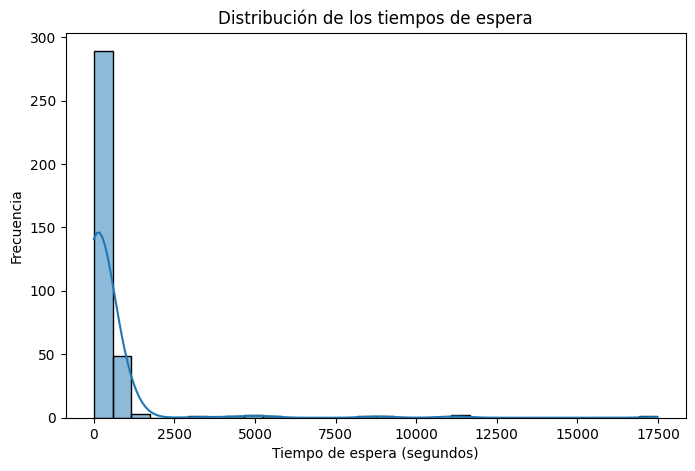

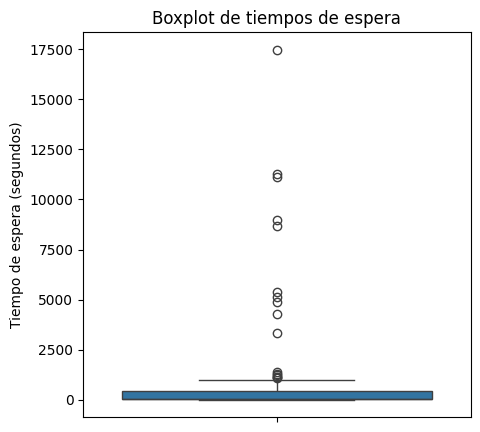

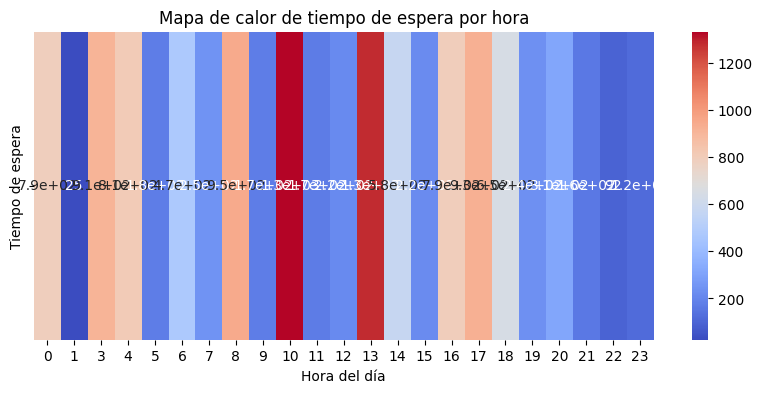

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir a datetime si no lo está
df['ts_kafka'] = pd.to_datetime(df['ts_kafka'])

# Ordenar por aeronave y tiempo
df = df.sort_values(by=['ICAO address', 'ts_kafka'])

# Lista para almacenar tiempos de espera
tiempos_espera = []
horas_espera = []

# Recorrer cada aeronave individualmente
for icao, grupo in df.groupby('ICAO address'):
    print(f"\nProcesando ICAO: {icao}")

    # Lista para almacenar los tiempos de despegue válidos para cada ICAO
    tiempos_despegue = []
    
    # Establecer el punto de partida
    indice_inicial = 0
    
    while True:
        # Buscar mensajes donde Capability cambia de False a True (transición de tierra a vuelo)
        tierra_a_vuelo = grupo[(grupo['Capability'] == False) & (grupo['Speed'] == 0)]
        
        if tierra_a_vuelo.empty:
            print(f"   ⚠️ No hay más eventos de tierra para {icao}")
            break  # No hay más eventos en tierra, salir del bucle
        
        # Filtrar para encontrar el último mensaje en tierra antes del despegue
        tierra_a_vuelo = tierra_a_vuelo.iloc[indice_inicial:]
        
        if tierra_a_vuelo.empty:
            print(f"   ⚠️ No hay eventos válidos para {icao}")
            break  # Si no hay eventos válidos, salir
        
        # Último mensaje en tierra antes del despegue
        ultimo_en_tierra = tierra_a_vuelo.iloc[-1]
        print(f"   ✅ Último en tierra: {ultimo_en_tierra['ts_kafka']}")

        # Buscar el primer mensaje en vuelo después de estar en tierra
        en_vuelo = grupo[(grupo['Capability'] == True) & (grupo['ts_kafka'] > ultimo_en_tierra['ts_kafka'])]
        
        if en_vuelo.empty:
            print(f"   ⚠️ No hay eventos de vuelo para {icao} después de estar en tierra")
            break  # No hay eventos de vuelo después del aterrizaje

        # Primer mensaje en vuelo
        primer_en_vuelo = en_vuelo.iloc[0]
        print(f"   ✅ Primer en vuelo: {primer_en_vuelo['ts_kafka']}")

        # Calcular el tiempo de espera entre el mensaje en tierra y el despegue
        tiempo_espera = (primer_en_vuelo['ts_kafka'] - ultimo_en_tierra['ts_kafka']).total_seconds()

        # Almacenar el tiempo de espera
        if tiempo_espera > 0:
            tiempos_espera.append(tiempo_espera)
            horas_espera.append(ultimo_en_tierra['ts_kafka'].hour)  # Guardar la hora del evento en tierra
            tiempos_despegue.append(primer_en_vuelo['ts_kafka'])  # Guardar la hora del despegue

        # Actualizar el índice para omitir las siguientes dos horas
        grupo_filtrado = grupo[grupo['ts_kafka'] > primer_en_vuelo['ts_kafka'] + pd.Timedelta(hours=2)]
        
        if grupo_filtrado.empty:
            print(f"   ⚠️ No hay más eventos después de omitir 2 horas para {icao}")
            break  # Si después de las 2 horas no hay más eventos, terminar

        # Omitir los siguientes dos horas de mensajes
        grupo = grupo_filtrado
        
        # Si ya no hay más despegues, terminar
        if grupo.empty:
            break

# Convertir a DataFrame
df_espera = pd.DataFrame({'Tiempo de espera': tiempos_espera, 'Hora': horas_espera})

# Si no hay datos, evitar errores
if df_espera.empty:
    print("⚠️ No se encontraron tiempos de espera válidos.")
else:
    # **Histograma**
    plt.figure(figsize=(8, 5))
    sns.histplot(df_espera['Tiempo de espera'], bins=30, kde=True)
    plt.xlabel('Tiempo de espera (segundos)')
    plt.ylabel('Frecuencia')
    plt.title('Distribución de los tiempos de espera')
    plt.show()

    # **Boxplot**
    plt.figure(figsize=(5, 5))
    sns.boxplot(y=df_espera['Tiempo de espera'])
    plt.ylabel('Tiempo de espera (segundos)')
    plt.title('Boxplot de tiempos de espera')
    plt.show()

    # **Mapa de calor (horas con mayor tiempo de espera)**
    espera_horas = df_espera.groupby('Hora')['Tiempo de espera'].mean().reset_index()

    # Graficar mapa de calor
    plt.figure(figsize=(10, 4))
    sns.heatmap(espera_horas.set_index('Hora').T, cmap='coolwarm', annot=True)
    plt.xlabel('Hora del día')
    plt.title('Mapa de calor de tiempo de espera por hora')
    plt.show()


In [22]:
print(df_espera['Tiempo de espera'].mean())
df_espera_sorted = df_espera.sort_values(by='Tiempo de espera')
print(df_espera_sorted)

923.9281437125749
     Tiempo de espera  Hora
139               1.0    11
227               1.0    20
302               2.0    22
109               4.0    10
24                5.0    10
..                ...   ...
104           22095.0    15
43            22872.0    11
25            23221.0     9
84            24021.0     7
308           24370.0     7

[501 rows x 2 columns]


In [31]:
# Filtrar los mensajes de un ICAO específico con Speed == 0
ica_address = 'e80475'
mensajes_speed_0 = df[(df['ICAO address'] == ica_address) & (df['Speed'] == 0)]

# Mostrar los mensajes
mensajes_speed_0


,ts_kafka,message,ICAO address,Type,Speed,Altitude,Capability,Capability_prev,Capability_shifted
38689633,2024-12-05 12:37:51,8ce80475381e13fd0a6ef1699382,e80475,Surface position,0.0,NaN,False,False,False
38689634,2024-12-05 12:37:51,8ce80475381e13fd0a6ef1699382,e80475,Surface position,0.0,NaN,False,False,False
38689637,2024-12-05 12:37:51,8ce80475381e16304a833bcf8310,e80475,Surface position,0.0,NaN,False,False,False
38689640,2024-12-05 12:37:52,8ce80475381e13fd026ef3072d91,e80475,Surface position,0.0,NaN,False,False,False
38689641,2024-12-05 12:37:52,8ce80475381e13fd026ef3072d91,e80475,Surface position,0.0,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...
38691393,2024-12-05 21:55:52,8ce80475381803fb106ce6d49d99,e80475,Surface position,0.0,NaN,False,False,False
38691394,2024-12-05 21:55:52,8ce804753818062e5a813c18b0e3,e80475,Surface position,0.0,NaN,False,False,False
38691398,2024-12-05 21:55:54,8ce80475381803fb106ce6d49d99,e80475,Surface position,0.0,NaN,False,False,False
38691400,2024-12-05 21:55:59,8ce80475381803fb106ce6d49d99,e80475,Surface position,0.0,NaN,False,False,False


In [3]:
df['Capability_prev'] = df.groupby('ICAO address')['Capability'].shift(1)

df_cambio = df[(df['Capability_prev'] == False) & (df['Capability'] == True)]

print(df_cambio[['ICAO address', 'Capability_prev', 'Capability']])

num_icaos_distintos = df_cambio['ICAO address'].nunique()
print(f"Número de ICAO distintos: {num_icaos_distintos}")


         ICAO address Capability_prev Capability
7              000000           False       True
275            000001           False       True
61933          010244           False       True
84254          020044           False       True
512099         0200ed           False       True
...               ...             ...        ...
38667570       e8045b           False       True
38689016       e80475           False       True
38691467       e80475           False       True
38691469       e80475           False       True
38691473       e80475           False       True

[904 rows x 3 columns]
Número de ICAO distintos: 395


In [14]:
df_cambio_e80475 = df_cambio[df_cambio['ICAO address'] == 'e80475']

df_cambio_e80475[['ts_kafka', 'ICAO address', 'Capability_prev', 'Capability']]


,ts_kafka,ICAO address,Capability_prev,Capability
38689016,2024-12-05 12:31:49,e80475,False,True
38691467,2024-12-05 21:56:41,e80475,False,True
38691469,2024-12-05 21:56:41,e80475,False,True
38691473,2024-12-05 21:56:41,e80475,False,True


In [96]:
df.columns

Index(['ts_kafka', 'message', 'ICAO address', 'Type', 'Speed', 'Altitude',
       'Capability', 'Capability_prev'],
      dtype='object')

In [4]:
# Paso 1: Encontrar aviones que han pasado de Capability=False a Capability=True
df_cambio = df.groupby("ICAO address")["Capability"].nunique()
aviones_cambiaron = df_cambio[df_cambio == 2].index  # Solo aviones con al menos un cambio

# Paso 2: Filtrar el dataframe para estos aviones
df_filtrado = df[df["ICAO address"].isin(aviones_cambiaron)]

# Paso 3: Verificar si tienen velocidad en algún mensaje
df_sin_speed = df_filtrado[df_filtrado["Speed"].notna()]  # Aviones con al menos una velocidad registrada
aviones_con_speed = df_sin_speed["ICAO address"].unique()  # Lista de aviones con speed registrado

# Paso 4: Obtener los aviones que cambiaron y nunca tuvieron speed
aviones_sin_speed = set(aviones_cambiaron) - set(aviones_con_speed)

print(f"Cantidad de aviones que cambiaron Capability y nunca tuvieron Speed: {len(aviones_sin_speed)}")
print(f"Lista de aviones sin Speed en ningún mensaje: {aviones_sin_speed}")


Cantidad de aviones que cambiaron Capability y nunca tuvieron Speed: 11
Lista de aviones sin Speed en ningún mensaje: {'3C0ACA', '4a35ab', '3452c6', '3453c5', '3420d5', '34645a', '000000', 342353, 347313, '45210d', '394c09'}
